# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [20]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.cross_validation import ShuffleSplit

# Import supplementary visualizations code visuals.py
import visuals as vs
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print "Boston housing dataset has {} data points with {} variables each.".format(*data.shape)

Boston housing dataset has 489 data points with 4 variables each.


In [2]:
print features.head()

      RM  LSTAT  PTRATIO
0  6.575   4.98     15.3
1  6.421   9.14     17.8
2  7.185   4.03     17.8
3  6.998   2.94     18.7
4  7.147   5.33     18.7


## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [3]:
# Minimum price of the data
minimum_price = np.min(prices)

# Maximum price of the data
maximum_price = np.max(prices)

# Mean price of the data
mean_price = np.mean(prices)

# Median price of the data
median_price = np.median(prices)

# Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


### Sales price distribution

In addition to basic descriptive statistics, I am curious on the shape of the distribution of the sales price for the 489 houses in the dataset.  Based on the descriptive statistics the distribution will be have a positive skew as the mean is greater than the median.

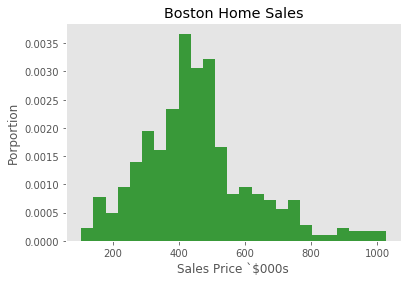

In [4]:
plt.hist(np.array(prices)/1000, 25, normed=1, facecolor='green', alpha=0.75)
plt.xlabel('Sales Price `$000s')
plt.ylabel('Porportion')
plt.title('Boston Home Sales')
plt.grid(False)
plt.show()

### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.


** Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each.**

**Hint:** This problem can phrased using examples like below.  
* Would you expect a home that has an `'RM'` value(number of rooms) of 6 be worth more or less than a home that has an `'RM'` value of 7?
* Would you expect a neighborhood that has an `'LSTAT'` value(percent of lower class workers) of 15 have home prices be worth more or less than a neighborhood that has an `'LSTAT'` value of 20?
* Would you expect a neighborhood that has an `'PTRATIO'` value(ratio of students to teachers) of 10 have home prices be worth more or less than a neighborhood that has an `'PTRATIO'` value of 15?

<h3><u>Answer 1 - Feature Observation</u></h3>

* Would expect homes with higher `'RM'` values (number of rooms) to have a higher sales price.  
> **Rationalization:** This assumption is based on an additional assumption that number of rooms has a strong positive correlation with total square feet of a house, of which is typically associated with higher house prices. Given most houses are quoted on a **dollar/sq foot** the more square footage the more expensive the house.
* Would expect homes in a neighborhood with a higher `'LSTAT'` value (percent of lower class workers) to have a lower sales price.  
> **Rationalization:** Salaries of lower class workers are typically lower than higher class workers and are less likely able to afford more expensive houses.  On the other end of the spectrum, higher class workers more likely able to afford more expensive houses.
* Would expect homes in a neighborhood with lower `'PTRATIO'` values (ratio of students to teachers) to have a higher sales prices.  
> **Rationalization:** Research ([here](http://www.centerforpubliceducation.org/Main-Menu/Organizing-a-school/Class-size-and-student-achievement-At-a-glance/Class-size-and-student-achievement-Research-review.html) and [here](https://www.brookings.edu/research/class-size-what-research-says-and-what-it-means-for-state-policy/)) indicates smaller class size lead to better education, leading to more funding required to pay for additional teachers and resources.  Most local funding for schools comes from property taxes(source: [PBS](http://www.pbs.org/wnet/wherewestand/blog/finance-how-do-we-fund-our-schools/197/)), of which provides more funding to school systems with higher property values.  This typical method of education funding can lead to large disparities in funding between communities with varying property values, indicating there will be fewer teachers in neighborhoods with lower property values.  The [Center for Public Education](http://www.centerforpubliceducation.org/Main-Menu/Organizing-a-school/Class-size-and-student-achievement-At-a-glance/Class-size-and-student-achievement-Research-review.html) notes that students in lower income (lower home prices based on previous LSTAT assumption) communities benefit more from smaller class sizes pushing local, state and federal governments to lean funding more towards lower income/class communities allowing for higher teacher counts.  The external funding aid helps reduce the correlation between home sales prices and ratio of students to teachers.

Next up is graphical analysis of stated assumptions.

----

## Does the data back up the preliminary  assumptions.

Below is a very simple exploratory analysis of the 3 features `'RM'`, `'LSTAT'`, and `'PTRATIO'` compared against sales price.

Try and error code if seaborn is not installed.

In [5]:
print "Statistics and quantiles for price ($000's)"
print (prices/1000).describe()

Statistics and quantiles for price ($000's)
count     489.000000
mean      454.342945
std       165.340278
min       105.000000
25%       350.700000
50%       438.900000
75%       518.700000
max      1024.800000
Name: MEDV, dtype: float64


Statistics for Number of Rooms: 
count    489.000000
mean       6.240288
std        0.643650
min        3.561000
25%        5.880000
50%        6.185000
75%        6.575000
max        8.398000
Name: RM, dtype: float64


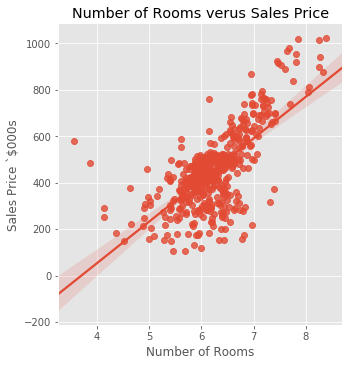

In [6]:
### Scatter plot with regression
xlab = 'Number of Rooms'
ylab = 'Sales Price `$000s'
title = 'Number of Rooms verus Sales Price'
feat = 'RM'
plt_data = pd.concat([prices/1000, features[feat]], axis=1)

print "Statistics for {}: ".format(xlab)
print features[feat].describe()

try:
    import seaborn as sns
    ax = sns.lmplot(x=feat,y='MEDV',data=plt_data,fit_reg=True)
    ax.set(title = title, 
           xlabel=xlab, 
           ylabel=ylab)
    plt.show()
except ImportError, e:
    print "\nSeaborn is not installed, using matplotlib instead."
    #scatter plot RM / MEDV  ( Number of rooms verus Sales Price)
    ax = plt_data.plot.scatter(x=feat, y='MEDV', 
                      title =title, 
                      ylim=(0,(maximum_price/1000)*1.05));
    ax.set_xlabel(xlab);
    ax.set_ylabel(ylab);

Statistics for % Lower Class Workers: 
Minimum % Lower Class Workers: 1.98
Maxium % Lower Class Workers: 37.97
Mean % Lower Class Workers: 12.94
Median % Lower Class Workers 11.69
Standard deviation of % Lower Class Workers: 7.08


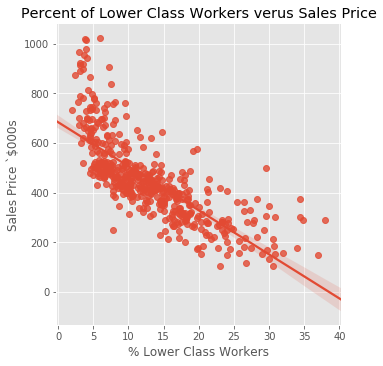

In [7]:
### Scatter plot with regression
xlab = '% Lower Class Workers'
ylab = 'Sales Price `$000s'
title = 'Percent of Lower Class Workers verus Sales Price'
feat = 'LSTAT'
plt_data = pd.concat([prices/1000, features[feat]], axis=1)

min_feat = features[feat].min()
max_feat = features[feat].max()
mean_feat = features[feat].mean()
median_feat = features[feat].median()
std_feat = features[feat].std()

print "Statistics for {}: ".format(xlab)
print "Minimum {}: {:,.2f}".format(xlab, min_feat)
print "Maxium {}: {:,.2f}".format(xlab, max_feat)
print "Mean {}: {:,.2f}".format(xlab, mean_feat)
print "Median {} {:,.2f}".format(xlab,median_feat)
print "Standard deviation of {}: {:,.2f}".format(xlab, std_feat)

try:
    import seaborn as sns
    ax = sns.lmplot(x=feat,y='MEDV',data=plt_data,fit_reg=True)
    ax.set(title = title, 
           xlabel=xlab, 
           ylabel=ylab)
    plt.show()
except ImportError, e:
    print "\nSeaborn is not installed, using matplotlib instead."
    #scatter plot RM / MEDV  ( Number of rooms verus Sales Price)
    ax = plt_data.plot.scatter(x=feat, y='MEDV', 
                      title =title, 
                      ylim=(0,(maximum_price/1000)*1.05));
    ax.set_xlabel(xlab);
    ax.set_ylabel(ylab);

Statistics for Ratio of Students to Teachers: 
Minimum Ratio of Students to Teachers: 12.60
Maxium Ratio of Students to Teachers: 22.00
Mean Ratio of Students to Teachers: 18.52
Median Ratio of Students to Teachers 19.10
Standard deviation of Ratio of Students to Teachers: 2.11


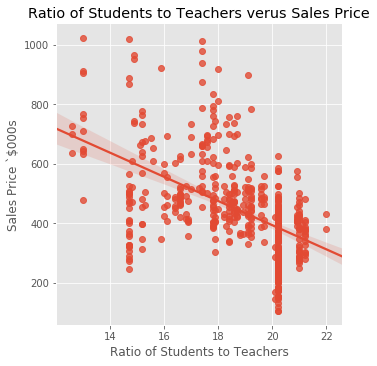

In [8]:
### Scatter plot with regression
xlab = 'Ratio of Students to Teachers'
ylab = 'Sales Price `$000s'
title = 'Ratio of Students to Teachers verus Sales Price'
feat = 'PTRATIO'
plt_data = pd.concat([prices/1000, features[feat]], axis=1)

min_feat = features[feat].min()
max_feat = features[feat].max()
mean_feat = features[feat].mean()
median_feat = features[feat].median()
std_feat = features[feat].std()

print "Statistics for {}: ".format(xlab)
print "Minimum {}: {:,.2f}".format(xlab, min_feat)
print "Maxium {}: {:,.2f}".format(xlab, max_feat)
print "Mean {}: {:,.2f}".format(xlab, mean_feat)
print "Median {} {:,.2f}".format(xlab,median_feat)
print "Standard deviation of {}: {:,.2f}".format(xlab, std_feat)

try:
    import seaborn as sns
    ax = sns.lmplot(x=feat,y='MEDV',data=plt_data,fit_reg=True)
    ax.set(title = title, 
           xlabel=xlab, 
           ylabel=ylab)
    plt.show()
except ImportError, e:
    print "\nSeaborn is not installed, using matplotlib instead."
    ax = plt_data.plot.scatter(x=feat, y='MEDV', 
                      title =title, 
                      ylim=(0,(maximum_price/1000)*1.05));
    ax.set_xlabel(xlab);
    ax.set_ylabel(ylab);

----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable._

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [9]:
# Import 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [10]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print "Model has a coefficient of determination, R^2, of {:.3f}.".format(score)

Model has a coefficient of determination, R^2, of 0.923.


* Would you consider this model to have successfully captured the variation of the target variable? 
* Why or why not?

** Hint: **  The R2 score is the proportion of the variance in the dependent variable that is predictable from the independent variable. In other words:
* R2 score of 0 means that the dependent variable cannot be predicted from the independent variable.
* R2 score of 1 means the dependent variable can be predicted from the independent variable.
* R2 score between 0 and 1 indicates the extent to which the dependent variable is predictable. An R2 score of 0.40 means that 40 percent of the variance in Y is predictable from X.

<h3><u>Answer 2 - Goodness of Fit</u></h3>

Yes, I believe this model captured a fair portion of the variance in the data.  While other models might be significantly better solutions, a model that can predict 92.3% of the variance is very close to perfect at 100%.

----

### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [11]:
from sklearn.cross_validation import train_test_split

# Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=42)

# Success
print "Training and testing split was successful."

Training and testing split was successful.


In [12]:
for i in (X_train, X_test, y_train, y_test):
    print i.shape

(391, 3)
(98, 3)
(391L,)
(98L,)


### Question 3 - Training and Testing

* What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?

**Hint:** Think about how overfitting or underfitting is contingent upon how splits on data is done.

<h3><u>Answer 3 - Training and Testing</u></h3>

Splitting a data set at a reasonable ratio into training and testing sets prevents the model from overfitting by providing data to test the accuracy of the model created. This allows the practitioner to evaluate which is the "best" model for future predictions.

When splitting the dataset at a reasonable ratio, the practitioner needs to be cognizant of applying a reasonable ratio that is typically in the range of 60-80% training the remainder testing. Having too much data in training could cause the model to overfit the data, conversely having too little data can cause the model to underfit or "memorize" the data.

The range of 60-80% for the training/testing ratio is considered reasonable as adding new data points to the training set initial greatly improves the training score yet eventually plateaus at a point where a reduction in the testing set size would be detrimental to effectively evaluating the model on the testing set.

---

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

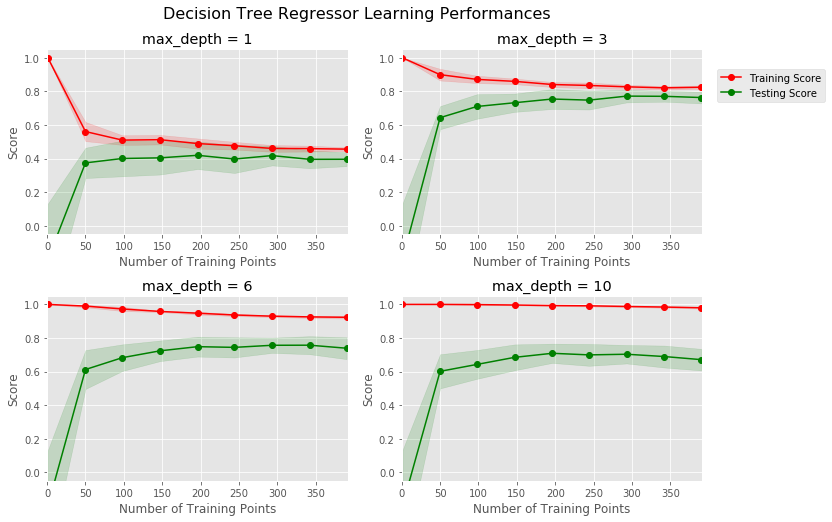

In [13]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
* Choose one of the graphs above and state the maximum depth for the model. 
* What happens to the score of the training curve as more training points are added? What about the testing curve? 
* Would having more training points benefit the model? 

**Hint:** Are the learning curves converging to particular scores? Generally speaking, the more data you have, the better. But if your training and testing curves are converging with a score above your benchmark threshold, would this be necessary?
Think about the pros and cons of adding more training points based on if the training and testing curves are converging.

<h3><u>Answer 4 - Learning the Data</u></h3>

* I would say optimal maximum depth is **3** given the maximum depth options of 1,3,6,10.  Maximum depth of 3 is optimal because the testing score is one of if not the best and the score difference between training and testing sets is low relative to other maximum depths indicating the model is not over fitting the data.
* On average the training score decreases as more points are added and the testing score increases.  The decrease in training score is result of the model being restricted from overfitting a few number of data points, thus causing the model to be less likely to incorrectly predict new data subsequently increasing the testing score.
* More training points benefits the model, however the increase in accuracy is diminishing relative to the number of training data points added.

---

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

** Run the code cell below and use this graph to answer the following two questions Q5 and Q6. **

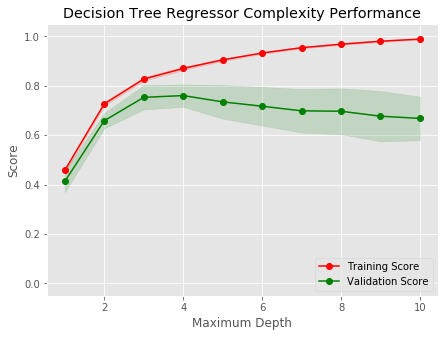

In [14]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
* When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? 
* How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?

**Hint:** High bias is a sign of underfitting(model is not complex enough to pick up the nuances in the data) and high variance is a sign of overfitting(model is by-hearting the data and cannot generalize well). Think about which model(depth 1 or 10) aligns with which part of the tradeoff.

<h3><u>Answer 5 - Bias-Variance Tradeoff</u></h3>

*  The model suffers from high bias when trained on a maximum depth of 1 as both the training and validation scores are low relative to other maximum depths.  This also means the model has a high error rate.
*  The model suffers from high variance when trained on a maximum depth of 10 as there is a significant difference in the score of the training and validation score and the validation score had started to diminish after a maximum depth of 4.
    * Yes, the graph justifies the conclusions as it shows a substantial difference in training and validation scores at a maximum depth of 10 indicate the model is overfitting the data and shows significantly lower scores at a max depth of 1 relative to other depths indicating the model is underfitting.

### Question 6 - Best-Guess Optimal Model
* Which maximum depth do you think results in a model that best generalizes to unseen data? 
* What intuition lead you to this answer?

** Hint: ** Look at the graph above Question 5 and see where the validation scores lie for the various depths that have been assigned to the model. Does it get better with increased depth? At what point do we get our best validation score without overcomplicating our model? And remember, Occams Razor states "Among competing hypotheses, the one with the fewest assumptions should be selected."

<h3><u>Answer 6 - Best-Guess Optimal Model</u></h3>

* A maximum depth of 4 will likely result in the model best generalizing on unseen data as the validation score is highest at a maximum depth of 4.  I do however have reservations that the model is over fitting given the training and testing scores start to deviate significantly at a max depth of 4.

-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
* What is the grid search technique?
* How it can be applied to optimize a learning algorithm?

** Hint: ** When explaining the Grid Search technique, be sure to touch upon why it is used,  what the 'grid' entails and what the end goal of this method is. To solidify your answer, you can also give an example of a parameter in a model that can be optimized using this approach.

<h3><u>Answer 7 - Grid Search</u></h3>

Grid search is a model tuning method for optimizing the hyper parameters (parameters) of a learning algorithm.  Unlike guess and check methods for selecting the best parameters, grid search does as the name implies and searches the “grid” or collection of sets of possible parameters for the best possible parameters while cross-validating.  Let's say I am looking to tune a Random Forest model, I may look at tuning the ``n_estimators`` and/or the ``max_depth`` parameters.  The ``max_depth`` parameter is the maximum depth of the decision trees much like the previous problems and the ``n_estimators`` is the number of number of trees in the forest or the number of decision tree models used to create the ensemble model or “Random Forest”.

### Question 8 - Cross-Validation

* What is the k-fold cross-validation training technique? 

* What benefit does this technique provide for grid search when optimizing a model?

**Hint:** When explaining the k-fold cross validation technique, be sure to touch upon what 'k' is, how the dataset is split into different parts for training and testing and the number of times it is run based on the 'k' value.

When thinking about how k-fold cross validation helps grid search, think about the main drawbacks of grid search which are hinged upon **using a particular subset of data for training or testing** and how k-fold cv could help alleviate that. You can refer to the [docs](http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation) for your answer.

<h3><u>Answer 8 - Cross-Validation</u></h3>

The k-folds is a type of cross-validation that splits the data into k number of folds or number of train/test splits so that all the data is a one point trained upon. This allows the model to be trained on all the data while hopefully not over-fitting as the model is testing against different testing data. The data can either be split evenly k times into different subsets or split randomly into k subsets when needed. 

This method of cross validation also improves grid search parameter optimization much as it does when training the model by reducing the tendency to overfit the parameters to a specific subset of the data.

An example of k-folds cross-validation with a ‘k’ value of 5 would take the data set and split into 5 training and testing splits in which 80% of the data training and the remaining 20% testing so that there is no overlap in testing subsets.   

### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

In addition, you will find your implementation is using `ShuffleSplit()` for an alternative form of cross-validation (see the `'cv_sets'` variable). While it is not the K-Fold cross-validation technique you describe in **Question 8**, this type of cross-validation technique is just as useful!. The `ShuffleSplit()` implementation below will create 10 (`'n_splits'`) shuffled sets, and for each shuffle, 20% (`'test_size'`) of the data will be used as the *validation set*. While you're working on your implementation, think about the contrasts and similarities it has to the K-fold cross-validation technique.

Please note that ShuffleSplit has different parameters in scikit-learn versions 0.17 and 0.18.
For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [19]:
# Importing 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.grid_search import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    # sklearn version 0.18: ShuffleSplit(n_splits=10, test_size=0.1, train_size=None, random_state=None)
    # sklearn versiin 0.17: ShuffleSplit(n, n_iter=10, test_size=0.1, train_size=None, random_state=None)
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':range(1,11)}

    # Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model

* What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [16]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])

Parameter 'max_depth' is 4 for the optimal model.


<h3><u>Answer 9 - Optimal Model</u></h3>

Parameter 'max_depth' is 4 for the optimal model.  The results are in line with the guess from Question 6.

### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |

* What price would you recommend each client sell his/her home at? 
* Do these prices seem reasonable given the values for the respective features? 

**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  Of the three clients, client 3 has has the biggest house, in the best public school neighborhood with the lowest poverty level; while client 2 has the smallest house, in a neighborhood with a relatively high poverty rate and not the best public schools.

Run the code block below to have your optimized model make predictions for each client's home.

In [17]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)

Predicted selling price for Client 1's home: $403,025.00
Predicted selling price for Client 2's home: $237,478.72
Predicted selling price for Client 3's home: $931,636.36


<h3><u>Answer 10 - Predicting Selling Prices</u></h3>

   * Predicted selling price for Client 1's home: $404,483.33. The selling price for Client 1's house that is near the median home sales price seems reasonable given the price premiums for below average(better) poverty level and student-teacher ratio compensates for the presumed dominate number of rooms that is below(worst) than the median.
   
   * Predicted selling price for Client 2's home: $230,922.22. The price feels high considering the values for all three features indicate a lower sales price.  However, it is unreasonable to predict the distribution of the tails with just simple descriptive statistics.
   
   * Predicted selling price for Client 3's home: $914,200.00. The price feels reasonable considering both the number of rooms and poverty level indicate a significantly higher sell price. The student-teacher ratio is roughly the median value of the sample yet as noted in the initial assumption and validified in the EDA, the ratio likely doesn't have much predictive power on home sales prices.

### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. 

**Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with respect to the data it's trained on.**

In [18]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $419,700.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $413,334.78
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $69,044.61


### Question 11 - Applicability

* In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.  

**Hint:** Take a look at the range in prices as calculated in the code snippet above. Some questions to answering:
- How relevant today is data that was collected from 1978? How important is inflation?
- Are the features present in the data sufficient to describe a home? Do you think factors like quality of apppliances in the home, square feet of the plot area, presence of pool or not etc should factor in?
- Is the model robust enough to make consistent predictions?
- Would data collected in an urban city like Boston be applicable in a rural city?
- Is it fair to judge the price of an individual home based on the characteristics of the entire neighborhood?

<h3><u>Answer 11 - Applicability</u></h3>

I would describe the model as more of a heuristic model that a robust 'real-world' production level model as the model has a relatively low R<sup>2</sup> score of only .80 compared to modern pricing models with very low error rates such as [Zillow Zestimate](https://www.zillow.com/zestimate/#acc) model. I would say the largest drawback of the model is that the data is outdated with likely significant changes to consumer tastes and preferences. Not only is the data outdated, but there are also too few features to make reasonable predictions. Additional features will likely help to improve the accuracy of the model.  Features could include total square footage, year build, has the house has been remodel, if remodeled then when, breakdown of rooms (bedrooms, bath, kitchen, etc.), quality various house features (appliances, flooring, kitchen, wall coverings, bathrooms, etc.), and additional amenities (garage, pool, deck, basement, and neighborhood facilities to say a few).

In addition to the lack of features, only one of the feature (number of rooms) is property specific with the other two features being neighborhood specific.  This drawback in the data could cause the model to tend to predict similar values for all houses within a neighborhood. This error could be more profound in neighborhoods where a lot of houses have been remodeled, leading to remodeled houses being valued based on number of rooms and not the higher quality due to the remodeling. Additionally, the model might not be as applicable in difference cities such in beach centric or rural cities. Houses with beach front would demand a premium price relative to similar houses without beach front. Similar in rural cities where land values are likely substantially less than urban cities, leading to lower home values with same features. 


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.